In [1]:
# import the basic library
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('IOT-CLIMATE.csv')

In [3]:
df.shape

(97606, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [5]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,8/12/2018 9:29,31,In


In [6]:
df.rename(columns = {'room_id/id':'room_id', 'out/in':'out_in'}, inplace = True)

In [7]:
df.head()

,id,room_id,noted_date,temp,out_in
0,__export__.temp_log_196134_bd201015,Room Admin,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,8/12/2018 9:29,31,In


In [8]:
df.nunique()

id            97605
room_id           1
noted_date    27920
temp             31
out_in            2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id     97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out_in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [10]:
#Let us drop room_id variable as it contains one unique value only and hence won't be of any use in our data analysis.

In [11]:
df.drop(columns = 'room_id', inplace = True)

In [12]:
print('No. of duplicate records in the data set : {}'.format(df.duplicated().sum()))

No. of duplicate records in the data set : 1


In [13]:
# Check for duplicate records.

df[df.duplicated()]

,id,noted_date,temp,out_in
11,__export__.temp_log_196108_4a983c7e,8/12/2018 9:25,42,Out


In [14]:
df.loc[df['id'] == '__export__.temp_log_196108_4a983c7e']

,id,noted_date,temp,out_in
10,__export__.temp_log_196108_4a983c7e,8/12/2018 9:25,42,Out
11,__export__.temp_log_196108_4a983c7e,8/12/2018 9:25,42,Out


In [15]:
#As per the requirement, id variable is supposed to contain unique values for each reading, rows identified above with 
#same id value can easily be pronounced as duplicate rows.

In [16]:
# Drop duplicate records.

df = df.drop_duplicates()

In [17]:
df[df.duplicated()]

,id,noted_date,temp,out_in


In [18]:
# Convert noted_date into date-time.

df['noted_date'] = pd.to_datetime(df['noted_date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97605 entries, 0 to 97605
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97605 non-null  object        
 1   noted_date  97605 non-null  datetime64[ns]
 2   temp        97605 non-null  int64         
 3   out_in      97605 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.7+ MB


In [20]:
df

,id,noted_date,temp,out_in
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In
...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In


In [21]:
"""
Most important point to note here is, noted_date variable has date-time values without seconds though its clearly 
mentioned in the requirement that the data has been recorded at seconds level.

In the absence of seconds component from noted_date variable values, the given data set would give a 
perception of Data Duplicacy or Data Redundancy for the combination of noted_date, 
out_in & temp variables.

"""

'\nMost important point to note here is, noted_date variable has date-time values without seconds though its clearly \nmentioned in the requirement that the data has been recorded at seconds level.\n\nIn the absence of seconds component from noted_date variable values, the given data set would give a \nperception of Data Duplicacy or Data Redundancy for the combination of noted_date, \nout_in & temp variables.\n\n'

In [22]:
# Check data duplicacy/ recording in same time ,  based on noted_date variable.

df.groupby(['noted_date'])['noted_date'].count().sort_values(ascending = False).head()

noted_date
2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
Name: noted_date, dtype: int64

In [23]:
df

,id,noted_date,temp,out_in
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In
...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In


In [24]:
"""If we take a closer look at the values of id variable, it has numeric and alpha-numeric values embedded in it 
which we may use as a primary key. We need to further analyse to determine if the numeric part can be used as a 
sort order to sort the given data set. Definitely, the alpha-numeric part will not help us in sorting the data.

For e.g. "export.temp_log_196134_bd201015". It has two very distinct values: 196134 and bd201015 which we 
need to analyse further to re-confirm if any one of these can be used as unique identifier."""

'If we take a closer look at the values of id variable, it has numeric and alpha-numeric values embedded in it \nwhich we may use as a primary key. We need to further analyse to determine if the numeric part can be used as a \nsort order to sort the given data set. Definitely, the alpha-numeric part will not help us in sorting the data.\n\nFor e.g. "export.temp_log_196134_bd201015". It has two very distinct values: 196134 and bd201015 which we \nneed to analyse further to re-confirm if any one of these can be used as unique identifier.'

In [25]:
#Consider the numerical part and see if it can be used to uniquely identify the observations and sort the data.

In [26]:
# Check if last but one bit of "id" can be used as primary key.

df['id'].apply(lambda x : x.split('_')[6]).nunique() == df.shape[0]

True

In [27]:
#Yes, the numerical part of id can be used as a primary key to uniquely identify the observations in the given data set.

In [28]:
#Let's further analyse numerical part of id in order to re-confirm if it can be used to sort the given data set.

In [29]:
# Create a new column to store last but one bit of id value.

df['id_num'] = df['id'].apply(lambda x : int(x.split('_')[6]))


In [30]:
df

,id,noted_date,temp,out_in,id_num
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,196134
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,196131
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,196127
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,196128
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,196126
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In,91076
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In,147733
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In,100386
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In,123297


In [31]:
#Closer look at values of id_num variable for a specific noted_date is going to give us some more insights on how data is recorded.

In [32]:
#temp_iot_data.loc[temp_iot_data['noted_date'] == pd.to_datetime('2018-09-12 03:09:00', format = '%Y-%m-%d %H:%M:%S'), ].sort_values(by = 'id_num').head(10)

In [33]:
df

,id,noted_date,temp,out_in,id_num
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,196134
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,196131
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,196127
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,196128
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,196126
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In,91076
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In,147733
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In,100386
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In,123297


In [34]:
# we see gaps in values between 196126 to 196134 .

In [35]:
df.loc[df['id_num'].isin(range(196126, 196150))].sort_values(by = 'id_num')

,id,noted_date,temp,out_in,id_num
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,196126
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,196127
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,196128
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,196131
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,196134


In [36]:
"""Some of the important observations we can make here are:

There is no data for id_num = 196129,196130,31,32,33.....
Also, id_num = 17004 observation has been recorded at "2018-09-12 03:08:00" 

while observation for id_num = 196126,27,28 have been recorded at same time "2018-08-12 09:29:00".

."""

'Some of the important observations we can make here are:\n\nThere is no data for id_num = 196129,196130,31,32,33.....\nAlso, id_num = 17004 observation has been recorded at "2018-09-12 03:08:00" \n\nwhile observation for id_num = 196126,27,28 have been recorded at same time "2018-08-12 09:29:00".\n\n.'

In [37]:
df

,id,noted_date,temp,out_in,id_num
0,__export__.temp_log_196134_bd201015,2018-08-12 09:30:00,29,In,196134
1,__export__.temp_log_196131_7bca51bc,2018-08-12 09:30:00,29,In,196131
2,__export__.temp_log_196127_522915e3,2018-08-12 09:29:00,41,Out,196127
3,__export__.temp_log_196128_be0919cf,2018-08-12 09:29:00,41,Out,196128
4,__export__.temp_log_196126_d30b72fb,2018-08-12 09:29:00,31,In,196126
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,2018-07-28 07:07:00,31,In,91076
97602,__export__.temp_log_147733_62c03f31,2018-07-28 07:07:00,31,In,147733
97603,__export__.temp_log_100386_84093a68,2018-07-28 07:06:00,31,In,100386
97604,__export__.temp_log_123297_4d8e690b,2018-07-28 07:06:00,31,In,123297


In [38]:
#We do not have data for id_nums 196129,30...even many more . Missing id_num values is really not a road block in sorting the data.

In [39]:
df.loc[df['noted_date'] == pd.to_datetime('2018-09-09 16:24:00', format = '%Y-%m-%d %H:%M:%S'), ].sort_values(by = 'id_num').head(10)

,id,noted_date,temp,out_in,id_num
84141,__export__.temp_log_4000_d0810820,2018-09-09 16:24:00,29,Out,4000
84142,__export__.temp_log_4002_3372baf8,2018-09-09 16:24:00,29,Out,4002
84128,__export__.temp_log_4006_75e9aa07,2018-09-09 16:24:00,28,Out,4006
84132,__export__.temp_log_4007_081bc47e,2018-09-09 16:24:00,29,Out,4007
84136,__export__.temp_log_4009_7c4f3581,2018-09-09 16:24:00,28,Out,4009
84137,__export__.temp_log_4010_c4fde86a,2018-09-09 16:24:00,28,Out,4010
84126,__export__.temp_log_4011_ec4e7131,2018-09-09 16:24:00,29,Out,4011
84122,__export__.temp_log_4012_cd72b48f,2018-09-09 16:24:00,29,Out,4012
84134,__export__.temp_log_4013_877ad0a7,2018-09-09 16:24:00,29,Out,4013
84123,__export__.temp_log_4014_a4d06122,2018-09-09 16:24:00,28,Out,4014


In [40]:
df.loc[df['id_num'].isin(range(4000, 4006))].sort_values(by = 'id_num')

,id,noted_date,temp,out_in,id_num
84141,__export__.temp_log_4000_d0810820,2018-09-09 16:24:00,29,Out,4000
84142,__export__.temp_log_4002_3372baf8,2018-09-09 16:24:00,29,Out,4002
84144,__export__.temp_log_4004_b88f8bc8,2018-09-09 16:23:00,28,Out,4004


In [41]:
#As seen before, we see a gap in id_num values.

In [42]:
df.loc[df['id_num'].isin(range(4002, 40015))].sort_values(by = 'id_num')

,id,noted_date,temp,out_in,id_num
84142,__export__.temp_log_4002_3372baf8,2018-09-09 16:24:00,29,Out,4002
84144,__export__.temp_log_4004_b88f8bc8,2018-09-09 16:23:00,28,Out,4004
84128,__export__.temp_log_4006_75e9aa07,2018-09-09 16:24:00,28,Out,4006
84132,__export__.temp_log_4007_081bc47e,2018-09-09 16:24:00,29,Out,4007
84136,__export__.temp_log_4009_7c4f3581,2018-09-09 16:24:00,28,Out,4009
...,...,...,...,...,...
51120,__export__.temp_log_40006_4e3a892e,2018-11-10 18:42:00,35,In,40006
51119,__export__.temp_log_40008_79648690,2018-11-10 18:43:00,49,Out,40008
51118,__export__.temp_log_40009_ee8cecb9,2018-11-10 18:44:00,35,In,40009
51117,__export__.temp_log_40011_d1499969,2018-11-10 18:45:00,48,Out,40011


In [43]:
#Based on the above observations, we can conclude that id_num variable can be used to sort the data set to get 
#the actual data in sorted order in spite of absence of seconds component in the noted_date variable.

In [44]:
#We'll use id_num as primary key to identify the observations uniquely. 

#Just bring the ID no. in the beginning of columen say 1 no. column.
#Replace id variable values with id_num and 

# than drop id_num variable from the data set.

In [45]:
df.loc[:, 'id'] = df.loc[:, 'id_num']

In [46]:
df

,id,noted_date,temp,out_in,id_num
0,196134,2018-08-12 09:30:00,29,In,196134
1,196131,2018-08-12 09:30:00,29,In,196131
2,196127,2018-08-12 09:29:00,41,Out,196127
3,196128,2018-08-12 09:29:00,41,Out,196128
4,196126,2018-08-12 09:29:00,31,In,196126
...,...,...,...,...,...
97601,91076,2018-07-28 07:07:00,31,In,91076
97602,147733,2018-07-28 07:07:00,31,In,147733
97603,100386,2018-07-28 07:06:00,31,In,100386
97604,123297,2018-07-28 07:06:00,31,In,123297


In [47]:
# Drop id_num column from the data set.

df.drop(columns = 'id_num', inplace = True)

In [48]:
df

,id,noted_date,temp,out_in
0,196134,2018-08-12 09:30:00,29,In
1,196131,2018-08-12 09:30:00,29,In
2,196127,2018-08-12 09:29:00,41,Out
3,196128,2018-08-12 09:29:00,41,Out
4,196126,2018-08-12 09:29:00,31,In
...,...,...,...,...
97601,91076,2018-07-28 07:07:00,31,In
97602,147733,2018-07-28 07:07:00,31,In
97603,100386,2018-07-28 07:06:00,31,In
97604,123297,2018-07-28 07:06:00,31,In


In [49]:
print('No. of years data : {}'.format(df['noted_date'].dt.year.nunique()))

No. of years data : 1


In [50]:
print('No. of months data : {}'.format(df['noted_date'].dt.month.nunique()))

No. of months data : 12


In [51]:
sorted(df['noted_date'].dt.month.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [52]:
#We have got data onlyfor 1 year .

In [53]:
print('No. of days data : {}'.format(df['noted_date'].dt.day.nunique()))

No. of days data : 24


In [54]:
#Variable : month column creation

In [55]:
df['month'] = df['noted_date'].apply(lambda x : int(x.month))

In [56]:
df['month'].unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 11, 10, 12,  9], dtype=int64)

In [57]:
#Variable : day column creation

In [58]:
df['day'] = df['noted_date'].apply(lambda x : int(x.day))

In [59]:
print(sorted(df['day'].unique()))

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [60]:
#Variable : day_name DAY NAME column creation

In [61]:
df['day_name'] = df['noted_date'].apply(lambda x : x.day_name())

In [62]:
print(df['day_name'].unique())

['Sunday' 'Thursday' 'Tuesday' 'Saturday' 'Monday' 'Friday' 'Wednesday']


In [63]:
#Variable : hour

In [64]:
df['hour'] = df['noted_date'].apply(lambda x : int(x.hour))

In [65]:
print(sorted(df['hour'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [66]:
df.head()

,id,noted_date,temp,out_in,month,day,day_name,hour
0,196134,2018-08-12 09:30:00,29,In,8,12,Sunday,9
1,196131,2018-08-12 09:30:00,29,In,8,12,Sunday,9
2,196127,2018-08-12 09:29:00,41,Out,8,12,Sunday,9
3,196128,2018-08-12 09:29:00,41,Out,8,12,Sunday,9
4,196126,2018-08-12 09:29:00,31,In,8,12,Sunday,9


In [67]:
"""Let's assume this data has been recorded in India. Based on this assumption, we can presume two very important things:

(A) Climatological Seasons:
  India Meteorological Department (IMD) follows the international standard of four climatological seasons with 
  some local adjustments:

  a. Winter (December, January and February).
  b. Summer (March, April and May).
  c. Monsoon means rainy season (June to September).
  d. Post-monsoon period (October to November).

Accordingly, we will create another variable season to hold the season which we are going derive based on month variable value.


(B) Unit of measurement used to measure temp**.

  As India follows SI units system of measurement, we assume that the temperature is recorded in degree celsius."""

"Let's assume this data has been recorded in India. Based on this assumption, we can presume two very important things:\n\n(A) Climatological Seasons:\n\u2003\u2003India Meteorological Department (IMD) follows the international standard of four climatological seasons with \n  some local adjustments:\n\n\u2003\u2003a. Winter (December, January and February).\n\u2003\u2003b. Summer (March, April and May).\n\u2003\u2003c. Monsoon means rainy season (June to September).\n\u2003\u2003d. Post-monsoon period (October to November).\n\nAccordingly, we will create another variable season to hold the season which we are going derive based on month variable value.\n\n\n(B) Unit of measurement used to measure temp**.\n\n\u2003\u2003As India follows SI units system of measurement, we assume that the temperature is recorded in degree celsius."

In [68]:
#Variable : season

In [69]:
def map_month_to_seasons(month_val):
    if month_val in [12, 1, 2]:
        season_val = 'Winter'
    elif month_val in [3, 4, 5]:
        season_val = 'Summer'
    elif month_val in [6, 7, 8, 9]:
        season_val = 'Monsoon'
    elif month_val in [10, 11]:
        season_val = 'Post_Monsoon'
    
    return season_val

In [70]:
df['season'] = df['month'].apply(lambda x : map_month_to_seasons(x))

In [71]:
df

,id,noted_date,temp,out_in,month,day,day_name,hour,season
0,196134,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon
1,196131,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon
2,196127,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon
3,196128,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon
4,196126,2018-08-12 09:29:00,31,In,8,12,Sunday,9,Monsoon
...,...,...,...,...,...,...,...,...,...
97601,91076,2018-07-28 07:07:00,31,In,7,28,Saturday,7,Monsoon
97602,147733,2018-07-28 07:07:00,31,In,7,28,Saturday,7,Monsoon
97603,100386,2018-07-28 07:06:00,31,In,7,28,Saturday,7,Monsoon
97604,123297,2018-07-28 07:06:00,31,In,7,28,Saturday,7,Monsoon


In [72]:
df['season'].value_counts(dropna = False)

Post_Monsoon    60920
Monsoon         18812
Summer           9137
Winter           8736
Name: season, dtype: int64

In [73]:
#Since, we have data for  complete year , we see Monsoon, Post_Monsoon, summer  and Winter in season variable.

In [74]:
df.head()

,id,noted_date,temp,out_in,month,day,day_name,hour,season
0,196134,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon
1,196131,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon
2,196127,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon
3,196128,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon
4,196126,2018-08-12 09:29:00,31,In,8,12,Sunday,9,Monsoon


In [75]:
#Variable : month_name column creation

In [76]:
df['month_name'] = df['noted_date'].apply(lambda x : x.month_name())

In [77]:
df['month_name'].value_counts(dropna = False)

October      44651
November     16269
September    11892
December      6298
March         4579
April         3334
June          2976
July          2181
August        1763
February      1250
May           1224
January       1188
Name: month_name, dtype: int64

In [78]:
#Variable : Timing column variable

In [79]:
"""Let's bin the hour into four different timings i.e. Night, Morning, Afternoon and Evening.

Night : 2200 - 2300 Hours & 0000 - 0359 Hours
Morning : 0400 - 1159 Hours
Afternoon : 1200 - 1659 Hours
Evening : 1700 - 2159 Hours"""

"Let's bin the hour into four different timings i.e. Night, Morning, Afternoon and Evening.\n\nNight : 2200 - 2300 Hours & 0000 - 0359 Hours\nMorning : 0400 - 1159 Hours\nAfternoon : 1200 - 1659 Hours\nEvening : 1700 - 2159 Hours"

In [80]:
def bin_hours_into_timing(hour_val):
    
    if hour_val in [22,23,0,1,2,3]:
        timing_val = 'Night (2200-0359 Hours)'
    elif hour_val in range(4, 12):
        timing_val = 'Morning (0400-1159 Hours)'
    elif hour_val in range(12, 17):
        timing_val = 'Afternoon (1200-1659 Hours)'
    elif hour_val in range(17, 22):
        timing_val = 'Evening (1700-2159 Hours)'
    else:
        timing_val = 'X'
        
    return timing_val

In [81]:
df['timing'] = df['hour'].apply(lambda x : bin_hours_into_timing(x))

In [82]:
df['timing'].value_counts(dropna = False)

Morning (0400-1159 Hours)      29590
Afternoon (1200-1659 Hours)    26686
Evening (1700-2159 Hours)      20806
Night (2200-0359 Hours)        20523
Name: timing, dtype: int64

In [83]:
#del unq_val_cnt_df

In [84]:
df.nunique()

id            97605
noted_date    27920
temp             31
out_in            2
month            12
day              24
day_name          7
hour             24
season            4
month_name       12
timing            4
dtype: int64

In [85]:
"""Very important to tell yourself all the time :

Do the Data Analysis for Inside and Outside temperatures, separately.
How is overall temperature variation across months inside and outside room?"""

'Very important to tell yourself all the time :\n\nDo the Data Analysis for Inside and Outside temperatures, separately.\nHow is overall temperature variation across months inside and outside room?'

Text(0.5, 1.0, 'Overall Temp. Variation Inside-Outside Room')

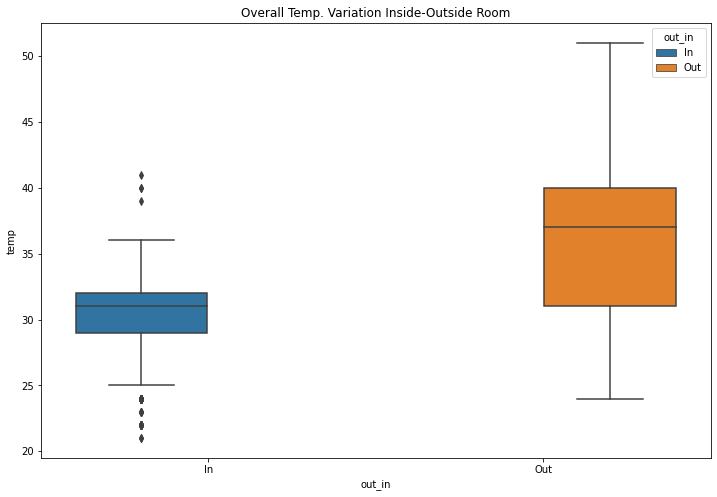

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(data= df, x='out_in',y="temp",hue="out_in")
plt.title('Overall Temp. Variation Inside-Outside Room')


In [87]:
"""Observations: (assuming there are no outliers)

Temperature recorded inside room :
 Min. temperature : 20°C.
 Max. temperature : 42°C.
Temperature recorded outside room :
 Min. temperature : 24°C.
 Max. temperature : 52°C.
Average tempurature recorded inside the room < Average temperature recorded outside the room. This is an obvious thing to observe.
Temperature has varied alot outside room when compared to inside.
Outside room : Magnitude of temperature variation before and after 37°C is almost same. However, temperature has varied a lot after reaching 40°C in comparison to temperature variation upto 31°C.
"""

'Observations: (assuming there are no outliers)\n\nTemperature recorded inside room :\n Min. temperature : 20°C.\n Max. temperature : 42°C.\nTemperature recorded outside room :\n Min. temperature : 24°C.\n Max. temperature : 52°C.\nAverage tempurature recorded inside the room < Average temperature recorded outside the room. This is an obvious thing to observe.\nTemperature has varied alot outside room when compared to inside.\nOutside room : Magnitude of temperature variation before and after 37°C is almost same. However, temperature has varied a lot after reaching 40°C in comparison to temperature variation upto 31°C.\n'

In [88]:
#How temperature varies across seasons?

Text(0.5, 1.0, 'Overall Temp. Variation Inside-Outside season wise ')

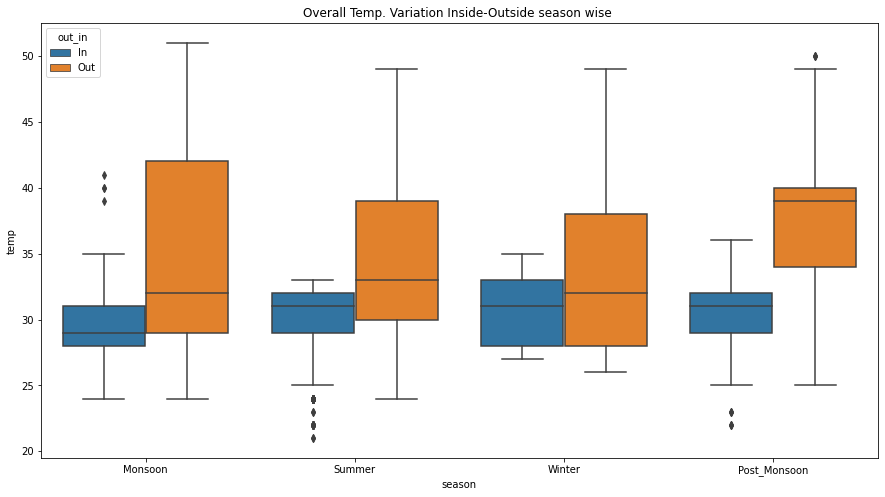

In [89]:
plt.figure(figsize=(15,8))
sns.boxplot(data= df, x='season',y="temp",hue="out_in")
plt.title('Overall Temp. Variation Inside-Outside season wise ')




In [90]:
"""Observations: (assuming there are no outliers)

Max. temperature of 51°C has been recorded in Monsoon season which is quite surprising and not expected in rainy season.
Note: We have to yet see when was this temperature was recorded; Is it at the start of monsoon season or at the end of the season?
As usual the lowest temperature of 21°C has been recorded in Winter season.
Magnitude of temperature variation is observed inside room in Monsoon season is higher compared to Winter and Post Monsoon season.
Similary, maximum temperature variation outside room is observed in Monsoon season.
In comparison to average (median) temperatures of inside and outside room of Winter and Post-Monsoon seasons, average (median) temperature 
recorded inside room is higher to that of outside room in the same season."""

'Observations: (assuming there are no outliers)\n\nMax. temperature of 51°C has been recorded in Monsoon season which is quite surprising and not expected in rainy season.\nNote: We have to yet see when was this temperature was recorded; Is it at the start of monsoon season or at the end of the season?\nAs usual the lowest temperature of 21°C has been recorded in Winter season.\nMagnitude of temperature variation is observed inside room in Monsoon season is higher compared to Winter and Post Monsoon season.\nSimilary, maximum temperature variation outside room is observed in Monsoon season.\nIn comparison to average (median) temperatures of inside and outside room of Winter and Post-Monsoon seasons, average (median) temperature \nrecorded inside room is higher to that of outside room in the same season.'

In [91]:
#How temperature varies across month?

Text(0.5, 1.0, 'Overall indoor outdoor Temp. Variation month wise')

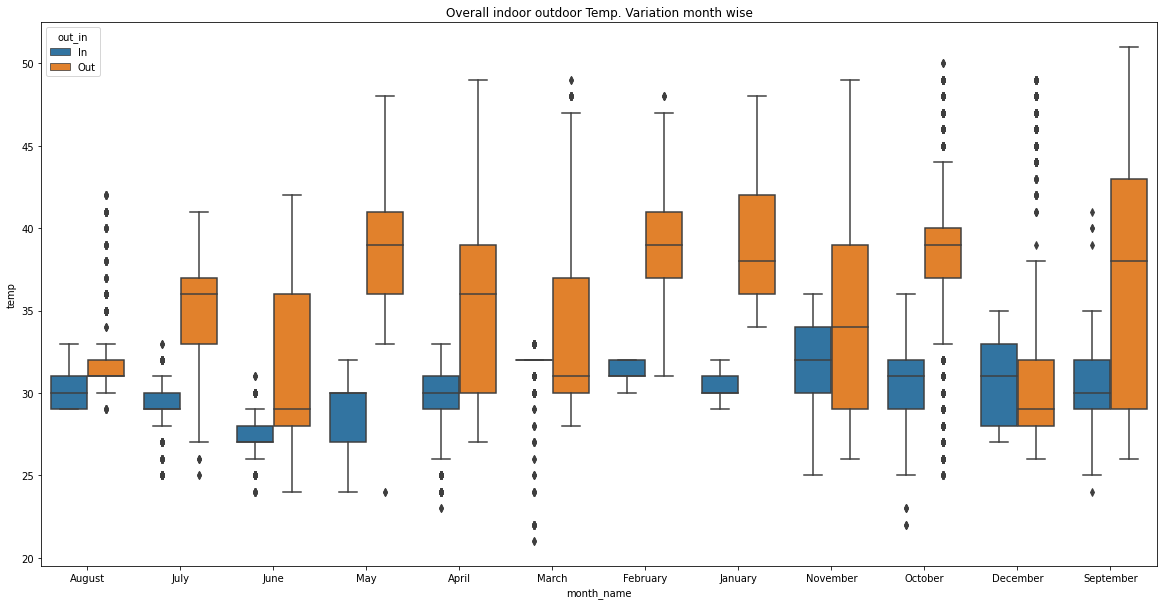

In [92]:
plt.figure(figsize=(20,10))
sns.boxplot(data= df, x='month_name',y="temp",hue="out_in")
plt.title('Overall indoor outdoor Temp. Variation month wise')


Text(0.5, 1.0, 'Overall Temp. Variation Inside-Outside Room')

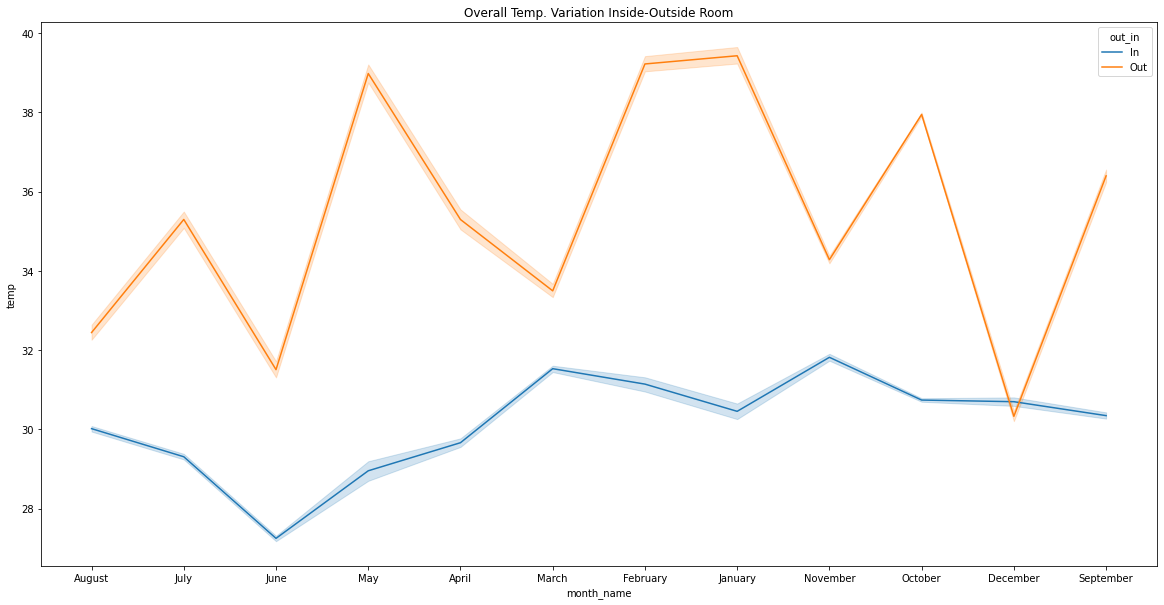

In [93]:
plt.figure(figsize=(20,10))
sns.lineplot(data= df, x='month_name',y="temp",hue="out_in")
plt.title('Overall Temp. Variation Inside-Outside Room')



Text(0.5, 1.0, 'Overall Temp. Variation timing')

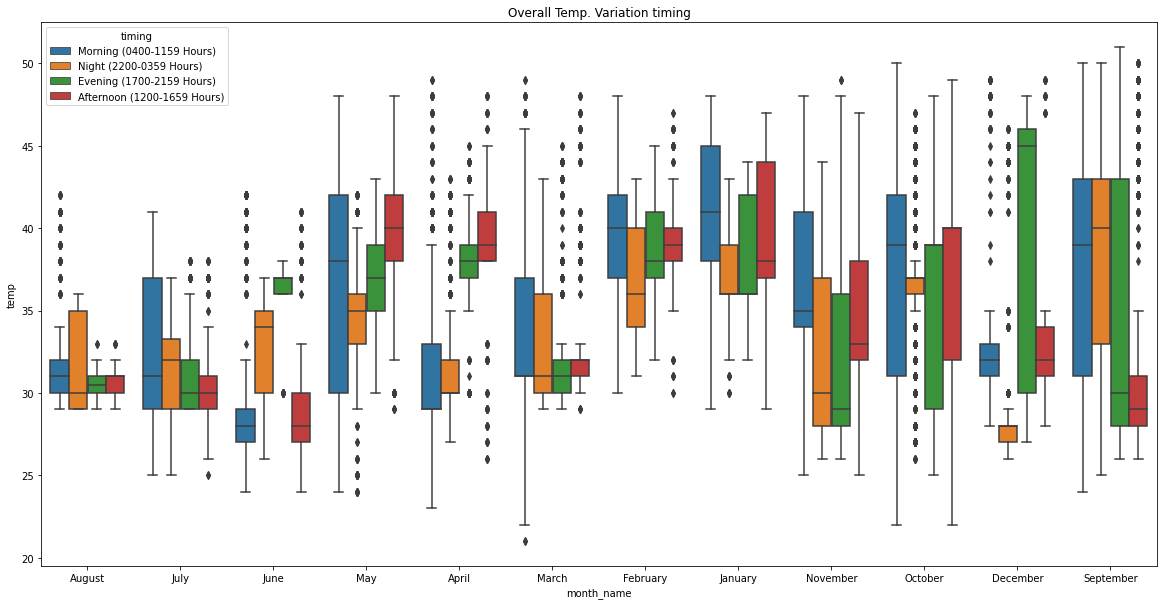

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(data= df, x='month_name',y="temp",hue="timing")
plt.title('Overall Temp. Variation timing')


In [95]:
"""Observations: (assuming there are no outliers)
(A) Inside room:

September month : Maximum temperature variation is observed in morning & evening.
October month : Highest average (median) temperature of 33°C has been recorded during evening & night.
Lowest temperature of 21°C is recorded in December month in the morning.
Highest temperature of 41°C is recorded in September month in the afternoon between 1400-1500 hours.
(B) Outside room:

September month : Maximum temperature variation is observed during afternoon.
November month : Highest average (median) temperature of 42°C has been recorded in morning.
Lowest temperature of 24°C is recorded in September month in the afternoon.
Highest temperature of 51°C is recorded in September month in the evening between 1700-1800 hours."""

'Observations: (assuming there are no outliers)\n(A) Inside room:\n\nSeptember month : Maximum temperature variation is observed in morning & evening.\nOctober month : Highest average (median) temperature of 33°C has been recorded during evening & night.\nLowest temperature of 21°C is recorded in December month in the morning.\nHighest temperature of 41°C is recorded in September month in the afternoon between 1400-1500 hours.\n(B) Outside room:\n\nSeptember month : Maximum temperature variation is observed during afternoon.\nNovember month : Highest average (median) temperature of 42°C has been recorded in morning.\nLowest temperature of 24°C is recorded in September month in the afternoon.\nHighest temperature of 51°C is recorded in September month in the evening between 1700-1800 hours.'

In [96]:
round(df['month_name'].value_counts(dropna = False) * 100 / df.shape[0],1)

October      45.7
November     16.7
September    12.2
December      6.5
March         4.7
April         3.4
June          3.0
July          2.2
August        1.8
February      1.3
May           1.3
January       1.2
Name: month_name, dtype: float64

In [97]:
"""Observations: (assuming there are no outliers)

Volume of data we have for July and August months is very very low compared to other months.
Maximum temperature variations are observed in September month both inside and outside the room.
Highest average temperature (median) of 39°C is observed in November months.
Lowest temperature of 21°C is recorded in December month.
Despite of Point No. 1, Minimum temperature variation is observed in July and August months."""

'Observations: (assuming there are no outliers)\n\nVolume of data we have for July and August months is very very low compared to other months.\nMaximum temperature variations are observed in September month both inside and outside the room.\nHighest average temperature (median) of 39°C is observed in November months.\nLowest temperature of 21°C is recorded in December month.\nDespite of Point No. 1, Minimum temperature variation is observed in July and August months.'

In [98]:
#How temperature varies for different timings for all seasons?

In [99]:
df.head()

,id,noted_date,temp,out_in,month,day,day_name,hour,season,month_name,timing
0,196134,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
1,196131,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
2,196127,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
3,196128,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
4,196126,2018-08-12 09:29:00,31,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)


In [100]:
tmp_df1 = round(df.groupby(['out_in', 'month', 'month_name', 'hour'])['temp'].mean(), 1).reset_index()
tmp_df1.head(10)

,out_in,month,month_name,hour,temp
0,In,1,January,0,32.0
1,In,1,January,2,31.8
2,In,1,January,3,30.4
3,In,1,January,4,30.0
4,In,1,January,5,30.0
5,In,1,January,6,30.0
6,In,1,January,7,30.0
7,In,1,January,8,29.9
8,In,1,January,9,30.0
9,In,1,January,10,30.0


In [101]:
"""Observations:
(A) Inside room:

Jan month : Saw Highest Average (Median) temperature of 32.0°C between 2000:2059 hours.

December month : Saw Lowest Average (Median) temperature of 26.9°C between 0400:0459 hours.
(B) Outside room:

October month : Saw the Highest Average (Median) temperature of 46.6°C between 0800:0859 hours.
December month : Saw the Lowest Average (Median) temperature of 29.4°C between 1900:1959 hours.
Compared to September, October & November months, December month's average temperature per hour has always been on lower side."""

"Observations:\n(A) Inside room:\n\nJan month : Saw Highest Average (Median) temperature of 32.0°C between 2000:2059 hours.\n\nDecember month : Saw Lowest Average (Median) temperature of 26.9°C between 0400:0459 hours.\n(B) Outside room:\n\nOctober month : Saw the Highest Average (Median) temperature of 46.6°C between 0800:0859 hours.\nDecember month : Saw the Lowest Average (Median) temperature of 29.4°C between 1900:1959 hours.\nCompared to September, October & November months, December month's average temperature per hour has always been on lower side."

In [102]:
tmp_df2 = round(df.groupby(['out_in', 'month', 'month_name', 'day_name'])['temp'].mean(), 1).reset_index()
tmp_df2.tail(20)

,out_in,month,month_name,day_name,temp
70,Out,9,September,Sunday,30.3
71,Out,9,September,Thursday,40.8
72,Out,9,September,Tuesday,41.3
73,Out,9,September,Wednesday,42.1
74,Out,10,October,Friday,41.9
75,Out,10,October,Monday,39.4
76,Out,10,October,Saturday,43.2
77,Out,10,October,Sunday,42.5
78,Out,10,October,Thursday,38.7
79,Out,10,October,Tuesday,30.9


In [103]:
"""Observation: : No distinct patterns found that provides an evidence to prove that a relation exists between day of the 
week and rise or fall in temperature for each month."""

'Observation: : No distinct patterns found that provides an evidence to prove that a relation exists between day of the \nweek and rise or fall in temperature for each month.'

Text(0.5, 1.0, 'mean inside outside  Temp. month wise')

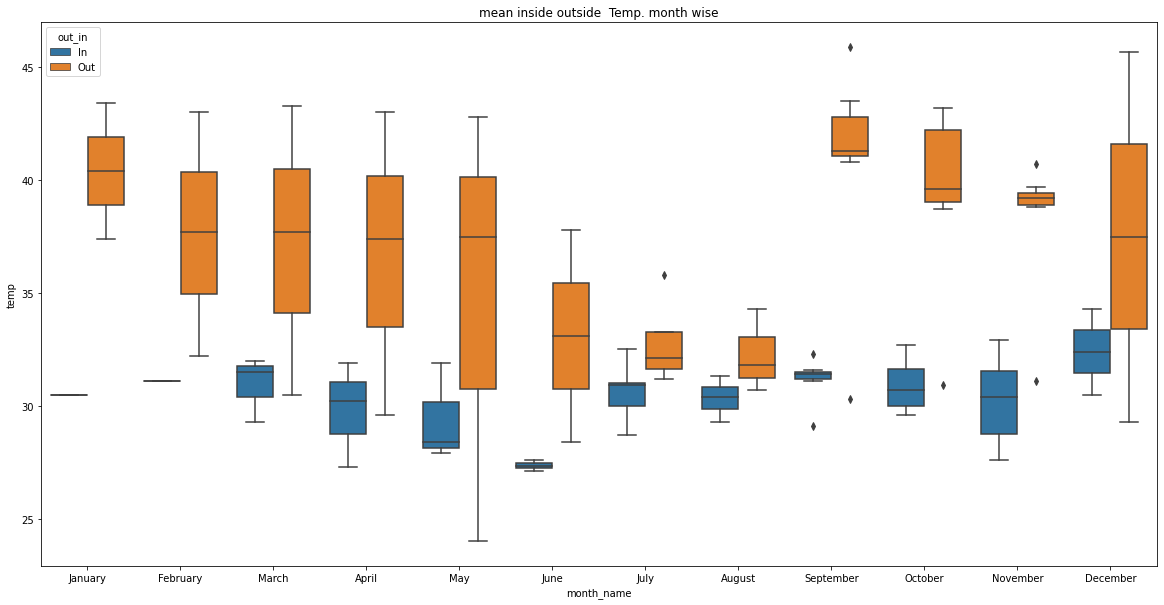

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(data= tmp_df2, x='month_name',y="temp",hue="out_in")
plt.title('mean inside outside  Temp. month wise')

In [105]:
tmp_df3 = df.groupby(['noted_date', 'out_in'])['temp'].mean().round(1).reset_index()

In [106]:
tmp_df3

,noted_date,out_in,temp
0,2018-01-11 00:06:00,In,32.0
1,2018-01-11 00:07:00,Out,40.0
2,2018-01-11 00:09:00,Out,39.0
3,2018-01-11 00:13:00,Out,40.0
4,2018-01-11 00:23:00,Out,40.0
...,...,...,...
31333,2018-12-10 23:41:00,Out,44.0
31334,2018-12-10 23:43:00,Out,44.0
31335,2018-12-10 23:49:00,Out,44.0
31336,2018-12-10 23:51:00,Out,45.0


# BUILDING MODEL 

In [107]:
df

,id,noted_date,temp,out_in,month,day,day_name,hour,season,month_name,timing
0,196134,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
1,196131,2018-08-12 09:30:00,29,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
2,196127,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
3,196128,2018-08-12 09:29:00,41,Out,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
4,196126,2018-08-12 09:29:00,31,In,8,12,Sunday,9,Monsoon,August,Morning (0400-1159 Hours)
...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,2018-07-28 07:07:00,31,In,7,28,Saturday,7,Monsoon,July,Morning (0400-1159 Hours)
97602,147733,2018-07-28 07:07:00,31,In,7,28,Saturday,7,Monsoon,July,Morning (0400-1159 Hours)
97603,100386,2018-07-28 07:06:00,31,In,7,28,Saturday,7,Monsoon,July,Morning (0400-1159 Hours)
97604,123297,2018-07-28 07:06:00,31,In,7,28,Saturday,7,Monsoon,July,Morning (0400-1159 Hours)


In [108]:
df_new=df.drop(["id","noted_date","day_name","season","month_name","timing"],axis=1)

In [109]:
df_new

,temp,out_in,month,day,hour
0,29,In,8,12,9
1,29,In,8,12,9
2,41,Out,8,12,9
3,41,Out,8,12,9
4,31,In,8,12,9
...,...,...,...,...,...
97601,31,In,7,28,7
97602,31,In,7,28,7
97603,31,In,7,28,7
97604,31,In,7,28,7


In [110]:
df_new["out_in"]=df_new["out_in"].astype("category")
df_new["out_in"]=df_new["out_in"].cat.codes

In [111]:
df_new

,temp,out_in,month,day,hour
0,29,0,8,12,9
1,29,0,8,12,9
2,41,1,8,12,9
3,41,1,8,12,9
4,31,0,8,12,9
...,...,...,...,...,...
97601,31,0,7,28,7
97602,31,0,7,28,7
97603,31,0,7,28,7
97604,31,0,7,28,7


In [112]:
#CHECKING MISSING VALUE

In [113]:
df_new.isnull().sum()

temp      0
out_in    0
month     0
day       0
hour      0
dtype: int64

In [114]:
"""There are Two kind of temperature measurement INDOOR and OUTDOOR. But the timing is not same, reference no. is also not same 
 we are calulating the prediction seprately"""
# creating dataset for indoor and outdoor measurement saperately.

'There are Two kind of temperature measurement INDOOR and OUTDOOR. But the timing is not same, reference no. is also not same \n we are calulating the prediction seprately'

In [115]:
df_indoor = df_new[df_new['out_in'] == 0]# indoor measurement

In [116]:
df_indoor

,temp,out_in,month,day,hour
0,29,0,8,12,9
1,29,0,8,12,9
4,31,0,8,12,9
5,31,0,8,12,9
6,29,0,8,12,9
...,...,...,...,...,...
97601,31,0,7,28,7
97602,31,0,7,28,7
97603,31,0,7,28,7
97604,31,0,7,28,7


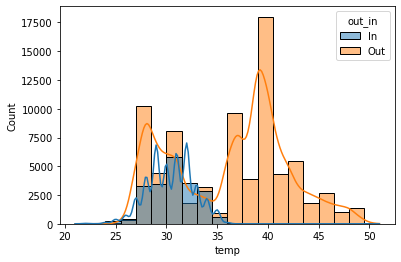

In [117]:
sns.histplot(data=df,x="temp",hue="out_in",bins=20,kde=True)
plt.show()

In [118]:
# its a NON LINEAR DATA

In [119]:
df_indoor_final=df_indoor.drop(["out_in","day"],axis=1)


In [120]:
df_indoor_final

,temp,month,hour
0,29,8,9
1,29,8,9
4,31,8,9
5,31,8,9
6,29,8,9
...,...,...,...
97601,31,7,7
97602,31,7,7
97603,31,7,7
97604,31,7,7


In [121]:
df_outdoor = df_new[df_new['out_in'] == 1]# outdoor measurement


In [122]:
df_outdoor_final=df_outdoor.drop(["out_in","day"],axis=1)


In [123]:
df_outdoor_final

,temp,month,hour
2,41,8,9
3,41,8,9
10,42,8,9
16,41,8,9
17,41,8,9
...,...,...,...
97587,32,7,7
97588,32,7,7
97594,32,7,7
97596,32,7,7


# WORKING ON INDOOR TEMPERATURE MONITORING

In [124]:



df_indoor_final


,temp,month,hour
0,29,8,9
1,29,8,9
4,31,8,9
5,31,8,9
6,29,8,9
...,...,...,...
97601,31,7,7
97602,31,7,7
97603,31,7,7
97604,31,7,7


In [125]:
#multicollinearity problems
df_indoor_final.corr()

,temp,month,hour
temp,1.000000,0.197042,0.057064
month,0.197042,1.000000,-0.040284
hour,0.057064,-0.040284,1.000000


<AxesSubplot:>

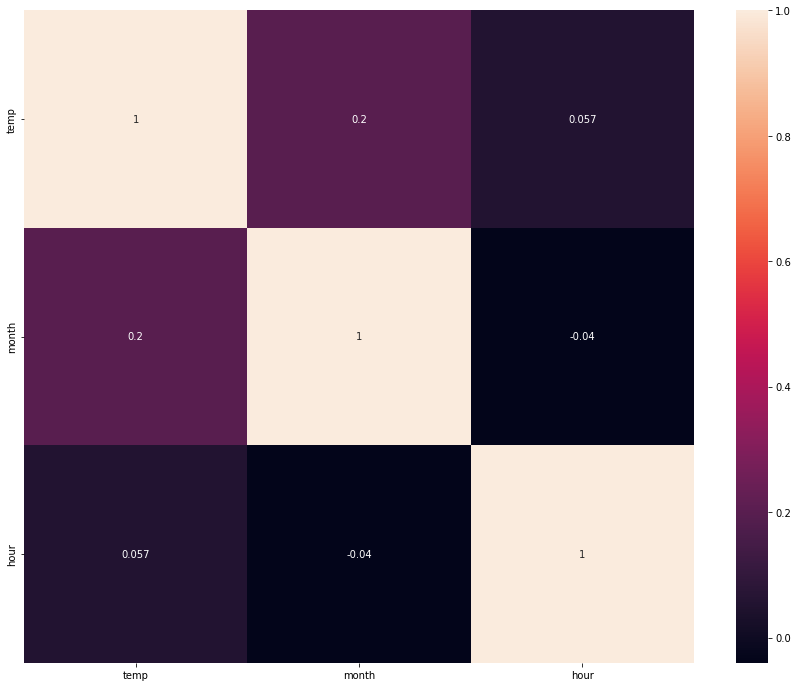

In [126]:
#Same data we can plot in heatmap for more better understanding.
plt.figure(figsize=(15,12))
sns.heatmap(df_indoor_final.corr(),annot=True)

In [127]:
# without standarization

In [128]:
X_indoor100=df_indoor_final.drop(["temp"],axis=1)
Y_indoor100=df_indoor_final["temp"]





Y_indoor_e=1.0 / (1.0 + np.exp(-Y_indoor100))
#X_indoor_log=np.log(X_indoor100)

In [129]:
Y_indoor_e

0        1.0
1        1.0
4        1.0
5        1.0
6        1.0
        ... 
97601    1.0
97602    1.0
97603    1.0
97604    1.0
97605    1.0
Name: temp, Length: 20345, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
#X_train100, X_test100,Y_train100,Y_test100=train_test_split(X_indoor100,Y_indoor100,train_size=0.75,random_state=101)

X_train100, X_test100,Y_train100,Y_test100=train_test_split(X_indoor100,Y_indoor_e,train_size=0.75,random_state=101)
print(X_train100.shape)
print(Y_train100.shape)
print(X_test100.shape)
print(Y_test100.shape)

(15258, 2)
(15258,)
(5087, 2)
(5087,)


In [132]:
X_train100

,month,hour
94957,3,10
76353,10,17
68949,11,16
95389,8,10
96712,10,9
...,...,...
49640,10,3
58658,12,8
91322,4,3
91668,4,2


In [133]:
from sklearn.linear_model import LinearRegression
lin_mod=LinearRegression()
lin_mod.fit(X_train100,Y_train100)
predict_LR=lin_mod.predict(X_test100)

print(predict_LR)

print(lin_mod.intercept_)
print(lin_mod.coef_)

[1. 1. 1. ... 1. 1. 1.]
0.9999999999956665
[3.44127646e-13 3.98022028e-14]


In [134]:
# Now predict the Model which we made by the trainging data. We will test the 
#independent variables of test data set and generate the output 
# Y dependent variable.

linY_predict100=lin_mod.predict(X_test100)
linY_predict100

array([1., 1., 1., ..., 1., 1., 1.])

In [135]:
Y_test100

14024    1.0
17993    1.0
59612    1.0
13976    1.0
81436    1.0
        ... 
86822    1.0
57912    1.0
3438     1.0
19903    1.0
90463    1.0
Name: temp, Length: 5087, dtype: float64

In [136]:
# lets calculate root means square error error
from sklearn.metrics import mean_squared_error
lin_mod_rmse=np.sqrt(mean_squared_error(linY_predict100,Y_test100))
print("RMSE VALUE FOR LINEAR REGRESSION IS : ",lin_mod_rmse )

RMSE VALUE FOR LINEAR REGRESSION IS :  1.348027397246746e-11


In [137]:
# NOW WE WILL CHECK OUR PREDICTION IS CORRECT OR NOT.
# WE WILL DO REGRESSION MODEL EVALUATION BY USING OLS METHOD WHICH IS VERY RELIABLE .
# IT WILL GENERATE R SEQUARE VALUE AND OTHER VALUES.
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model=smf.OLS(endog=Y_train100,exog=X_train100).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                          1.100e+05
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:58:05   Log-Likelihood:                         -779.06
No. Observations:               15258   AIC:                                      1562.
Df Residuals:                   15256   BIC:                                      1577.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month          0.0789      0.000    188.681      0.000       0.078       0.080
hour           0.0234      0.000     76.159      0.000       0.023       0.024
==============================================================================
Omnibus:                     1024.505   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1242.608
Skew:                           0.697   Prob(JB):                    1.48e-270
Kurtosis:                       2.898   Cond. No.                         3.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
reg_model=smf.OLS(endog=Y_test100,exog=X_test100).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   temp   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          3.558e+04
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:58:05   Log-Likelihood:                         -331.22
No. Observations:                5087   AIC:                                      666.4
Df Residuals:                    5085   BIC:                                      679.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month          0.0799      0.001    108.283      0.000       0.078       0.081
hour           0.0226      0.001     41.017      0.000       0.022       0.024
==============================================================================
Omnibus:                      368.597   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.263
Skew:                           0.728   Prob(JB):                     6.20e-99
Kurtosis:                       2.882   Cond. No.                         3.57
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""